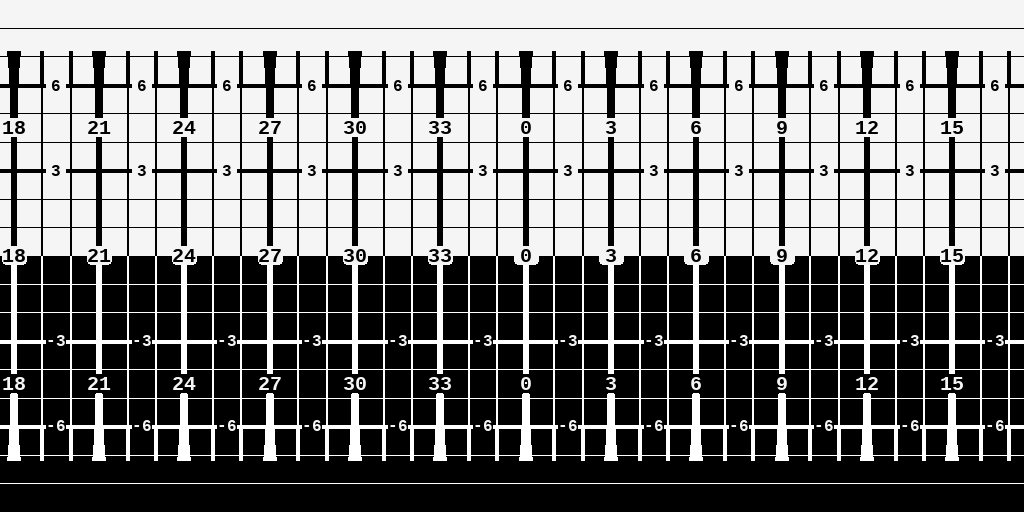

In [59]:
from math import *
from random import *
from PIL import Image
from PIL import ImageDraw, ImageColor, ImageFont
import matplotlib
#system_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#print(system_fonts)
font20 = ImageFont.truetype("/LiberationMono-Bold.ttf", 20)
font18 = ImageFont.truetype("/LiberationMono-Bold.ttf", 16)


starQty = 10000
texResX = 1024
texResY = 512
wideline = 4
narrowline = 1

def half_width_at_y(y, width):
  angle = texResY/2 - y
  if y > texResY/2:
    angle *= -1
  angle = angle/texResY*pi
  return width/cos(angle)/2

def width_at_y(y, width):
  return 2*half_width_at_y(y, width)

def v_line(context, x, height, minwidth):
  points = []
  for y in range(int(texResY/2-height/2), int(texResY/2)+1):
    points.append((x-half_width_at_y(y, minwidth),y))
  for y in range(int(texResY/2), int(texResY/2-height/2)-1, -1):
    points.append((x+half_width_at_y(y, minwidth),y))
  context.polygon(points, "black")
  points = []
  for y in range(int(texResY/2), int(texResY/2+height/2)+1):
    points.append((x-half_width_at_y(y, minwidth),y))
  for y in range(int(texResY/2+height/2), int(texResY/2)-1, -1):
    points.append((x+half_width_at_y(y, minwidth),y))
  context.polygon(points, "white")




img = Image.new("RGB", (texResX,texResY), ImageColor.getrgb("whitesmoke"))
d = ImageDraw.Draw(img)
d.rectangle(((0,texResY/2),(texResX,texResY)),fill="black")

angle = 5.0
while angle <= 360.0:
  v_line(d, int(angle*texResX/360), texResY*4/5, wideline)
  angle += 30.0
angle = 15.0
while angle <= 360.0:
  v_line(d, int(angle*texResX/360), texResY*4/5, narrowline)
  angle += 10.0
for angle in [60, 30, -30, -60]:
  ycoord = int(texResY/2 - angle/90*texResY/2)
  d.line([(0, ycoord),(texResX, ycoord)], "black" if angle > 0 else "white", wideline)
for angle in [80,70,50,40,20,10,-10,-20,-40,-50,-70, -80]:
  ycoord = int(texResY/2 - angle/90*texResY/2)
  d.line([(0, ycoord),(texResX, ycoord)], "black" if angle > 0 else "white", narrowline)
for lat in [45, 0, -45]:
  for lon in [18, 21, 24, 27, 30, 33, 0, 3, 6, 9, 12, 15]:
    y = texResY/2 - int(lat/90*texResY/2)
    x = int(texResX*(lon*10+(180 if lon < 18 else -180)+5)/360)
    #print(x,y)
    color = "black"
    bcolor = "whitesmoke"
    if lat < 0:
      color = "whitesmoke"
      bcolor = "black"
    d.rounded_rectangle(((x-12, y-10),(x+12, y+8)),4,bcolor)
    d.text((x, y), str(lon), color, font20, "mm")
for lat in [60, 30, -30, -60]:
  for lon in [19.5, 22.5, 25.5, 28.5, 31.5, 34.5, 1.5, 4.5, 7.5, 10.5, 13.5, 16.5]:
    y = texResY/2 - int(lat/90*texResY/2)
    x = int(texResX*(lon*10+(180 if lon < 18 else -180)+5)/360)
    #print(x,y)
    color = "black"
    bcolor = "whitesmoke"
    if lat < 0:
      color = "whitesmoke"
      bcolor = "black"
    d.rounded_rectangle(((x-10, y-11),(x+9, y+7)),4,bcolor)
    d.text((x, y), str(int(lat/10)), color, font18, "mm")


img